In [2]:
# PART 1 - Naprawione wczytanie danych pomiarowych

import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import files
# Wczytanie danych z pliku CSV
# Przesyłanie pliku z lokalnego komputera
uploaded = files.upload()

# Odczytanie pliku do DataFrame (zakładamy plik CSV)
for file_path in uploaded.keys():
    print(f"Przesłano plik: {file_path}")
    dane_instalacji = pd.read_csv(file_path, sep='\t', skiprows=2)

dane_instalacji = pd.read_csv(
    file_path,
    sep='\t',
    skiprows=2,  # Pomija dodatkowe nagłówki
    decimal=',',  # Przecinek jako separator dziesiętny
    na_values=[''],  # Zamiana pustych wartości na NaN
    engine='python'
)

# Naprawa nazw kolumn - unikanie duplikatów
dane_instalacji.columns = [
    'Data', 'Czas', 'PV1 Pd', 'PV2 Wsch', 'PV3 Zach', 'PV4 Wsch',
    'Obciążenie L1', 'Obciążenie L2', 'Obciążenie L3',
    'PV1 Pd_max', 'PV2 Wsch_max', 'PV3 Zach_max', 'PV4 Wsch_max',
    'Obciążenie L1_max', 'Obciążenie L2_max', 'Obciążenie L3_max',
    'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'
]

# Usunięcie wierszy z błędnymi datami
dane_instalacji = dane_instalacji[dane_instalacji['Data'].str.match(r'\d{2}\.\d{2}\.\d{4}', na=False)]

# Tworzenie znacznika czasowego (timestamp) z daty i czasu
dane_instalacji['timestamp'] = pd.to_datetime(
    dane_instalacji['Data'] + ' ' + dane_instalacji['Czas'],
    format='%d.%m.%Y %H:%M:%S',
    errors='coerce'  # Zamiana błędnych wartości na NaT
)

# Usunięcie wierszy z błędnymi znacznikami czasu
dane_instalacji.dropna(subset=['timestamp'], inplace=True)

# Usunięcie kolumn 'Data' i 'Czas', ponieważ są już zawarte w 'timestamp'
dane_instalacji.drop(['Data', 'Czas'], axis=1, inplace=True)

# Ustawienie 'timestamp' jako indeksu
dane_instalacji.set_index('timestamp', inplace=True)

# Konwersja kolumn na wartości liczbowe
dane_instalacji = dane_instalacji.apply(pd.to_numeric, errors='coerce')

# Grupowanie danych w interwałach 30-minutowych i obliczanie średnich wartości
dane_30min = dane_instalacji.resample('30T').mean()

# Wyświetlenie pierwszych wierszy przetworzonych danych
print("Przetworzone dane (pierwsze wiersze):")
print(dane_30min.head())



Saving dane_03-06.csv to dane_03-06.csv
Przesłano plik: dane_03-06.csv
Przetworzone dane (pierwsze wiersze):
                     PV1 Pd  PV2 Wsch  PV3 Zach  PV4 Wsch  Obciążenie L1  \
timestamp                                                                  
2024-03-01 00:00:00     0.0       0.0       0.0       2.0     182.084000   
2024-03-01 00:30:00     0.0       0.0       0.0       2.0     206.571667   
2024-03-01 01:00:00     0.0       0.0       0.0       2.0     201.331667   
2024-03-01 01:30:00     0.0       0.0       0.0       2.0     145.028333   
2024-03-01 02:00:00     0.0       0.0       0.0       2.0     246.950000   

                     Obciążenie L2  Obciążenie L3  PV1 Pd_max  PV2 Wsch_max  \
timestamp                                                                     
2024-03-01 00:00:00      27.364000      30.962000         0.0           0.0   
2024-03-01 00:30:00      18.900000      31.736667         0.0           0.0   
2024-03-01 01:00:00      17.806667      32

<ipython-input-2-01ee3b96e03f>:60: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dane_30min = dane_instalacji.resample('30T').mean()


In [3]:
from google.colab import files
import pandas as pd

# Przesyłanie wielu plików z lokalnego komputera
uploaded = files.upload()

# Lista do przechowywania przetworzonych DataFrames
forecast_data_list = []

# Iteracyjne przetwarzanie każdego przesłanego pliku
for filename in uploaded.keys():
    print(f"Przesłano plik: {filename}")

    # Wczytanie pliku prognozowego
    forecast_data = pd.read_csv(filename)

    # Konwersja kolumny 'period_end' na datetime
    forecast_data['period_end'] = pd.to_datetime(forecast_data['period_end'], errors='coerce')
    forecast_data = forecast_data.dropna(subset=['period_end'])  # Usunięcie błędnych wierszy

    # Ustawienie 'period_end' jako indeksu
    forecast_data.set_index('period_end', inplace=True)

    # Upewnienie się, że wszystkie kolumny są numeryczne
    forecast_data = forecast_data.apply(pd.to_numeric, errors='coerce')

    # Resampling: Interpolacja do interwałów 30-minutowych
    forecast_30min = forecast_data.resample('30min').interpolate(method='linear')

    # Dodanie przetworzonego DataFrame do listy
    forecast_data_list.append(forecast_30min)

# Scalanie wszystkich przetworzonych prognoz w jeden DataFrame
all_forecast_data = pd.concat(forecast_data_list).sort_index()

# Wyświetlenie kilku pierwszych wierszy scalonych danych prognozowych
print("Scalone dane prognozowe (pierwsze wiersze):")
print(all_forecast_data.head())


Saving P4_2024-03-05 10-00-01.csv to P4_2024-03-05 10-00-01.csv
Saving P4_2024-03-05 12-00-01.csv to P4_2024-03-05 12-00-01.csv
Saving P4_2024-03-05 14-00-01.csv to P4_2024-03-05 14-00-01.csv
Saving P4_2024-03-05 16-00-01.csv to P4_2024-03-05 16-00-01.csv
Saving P4_2024-03-05 18-00-01.csv to P4_2024-03-05 18-00-01.csv
Saving P4_2024-03-05 20-00-01.csv to P4_2024-03-05 20-00-01.csv
Saving P4_2024-03-06 02-00-01.csv to P4_2024-03-06 02-00-01.csv
Saving P4_2024-03-06 04-00-02.csv to P4_2024-03-06 04-00-02.csv
Saving P4_2024-03-06 06-00-01.csv to P4_2024-03-06 06-00-01.csv
Saving P4_2024-03-06 08-00-01.csv to P4_2024-03-06 08-00-01.csv
Saving P4_2024-03-06 10-00-01.csv to P4_2024-03-06 10-00-01.csv
Saving P4_2024-03-06 12-00-01.csv to P4_2024-03-06 12-00-01.csv
Saving P4_2024-03-06 14-00-01.csv to P4_2024-03-06 14-00-01.csv
Saving P4_2024-03-06 16-00-01.csv to P4_2024-03-06 16-00-01.csv
Saving P4_2024-03-06 18-00-00.csv to P4_2024-03-06 18-00-00.csv
Saving P4_2024-03-06 20-00-01.csv to P4_

In [4]:
# Upewnienie się, że oba indeksy są pozbawione stref czasowych
dane_30min.index = dane_30min.index.tz_localize(None)  # Usuń strefę czasową, jeśli istnieje
all_forecast_data.index = all_forecast_data.index.tz_localize(None)  # Usuń strefę czasową, jeśli istnieje

# Łączenie danych na podstawie najbliższych znaczników czasu
merged_data = pd.merge_asof(
    dane_30min.sort_index(),          # Dane pomiarowe
    all_forecast_data.sort_index(),  # Dane prognozowe
    left_index=True,                 # Indeks w danych pomiarowych
    right_index=True,                # Indeks w danych prognozowych
    direction='nearest'              # Dopasowanie najbliższego znacznika czasu
)

# Wyświetlenie kilku pierwszych wierszy scalonych danych
print("Scalone dane (pierwsze wiersze):")
print(merged_data.head())

# Zapisanie scalonych danych do pliku CSV
merged_data.to_csv('merged_data.csv')
print("Scalone dane zapisano w pliku 'merged_data.csv'")


Scalone dane (pierwsze wiersze):
                     PV1 Pd  PV2 Wsch  PV3 Zach  PV4 Wsch  Obciążenie L1  \
timestamp                                                                  
2024-03-01 00:00:00     0.0       0.0       0.0       2.0     182.084000   
2024-03-01 00:30:00     0.0       0.0       0.0       2.0     206.571667   
2024-03-01 01:00:00     0.0       0.0       0.0       2.0     201.331667   
2024-03-01 01:30:00     0.0       0.0       0.0       2.0     145.028333   
2024-03-01 02:00:00     0.0       0.0       0.0       2.0     246.950000   

                     Obciążenie L2  Obciążenie L3  PV1 Pd_max  PV2 Wsch_max  \
timestamp                                                                     
2024-03-01 00:00:00      27.364000      30.962000         0.0           0.0   
2024-03-01 00:30:00      18.900000      31.736667         0.0           0.0   
2024-03-01 01:00:00      17.806667      32.438333         0.0           0.0   
2024-03-01 01:30:00      17.685000     

Podstawowe statystyki opisowe dla scalonych danych:
            PV1 Pd     PV2 Wsch     PV3 Zach     PV4 Wsch  Obciążenie L1  \
count  5765.000000  5765.000000  5765.000000  5765.000000    5765.000000   
mean    -96.188618  -385.609417  -148.684254  -754.919214     255.043248   
std     147.115470   549.831340   224.932984  1088.686204     200.333988   
min    -551.631667 -2046.058333  -992.446667 -3571.375000       0.000000   
25%    -146.891667  -646.260000  -213.545000 -1192.641667     156.855000   
50%      -9.178333   -45.166667   -28.000000  -149.306667     200.920000   
75%       0.000000     0.000000     0.000000     2.000000     261.958333   
max       1.895000     0.533333     0.190000    16.351667    2002.621667   

       Obciążenie L2  Obciążenie L3   PV1 Pd_max  PV2 Wsch_max  PV3 Zach_max  \
count    5765.000000    5765.000000  5765.000000   5765.000000   5765.000000   
mean       78.207393     324.419571  -124.961668   -443.970714   -171.209459   
std       188.386916   

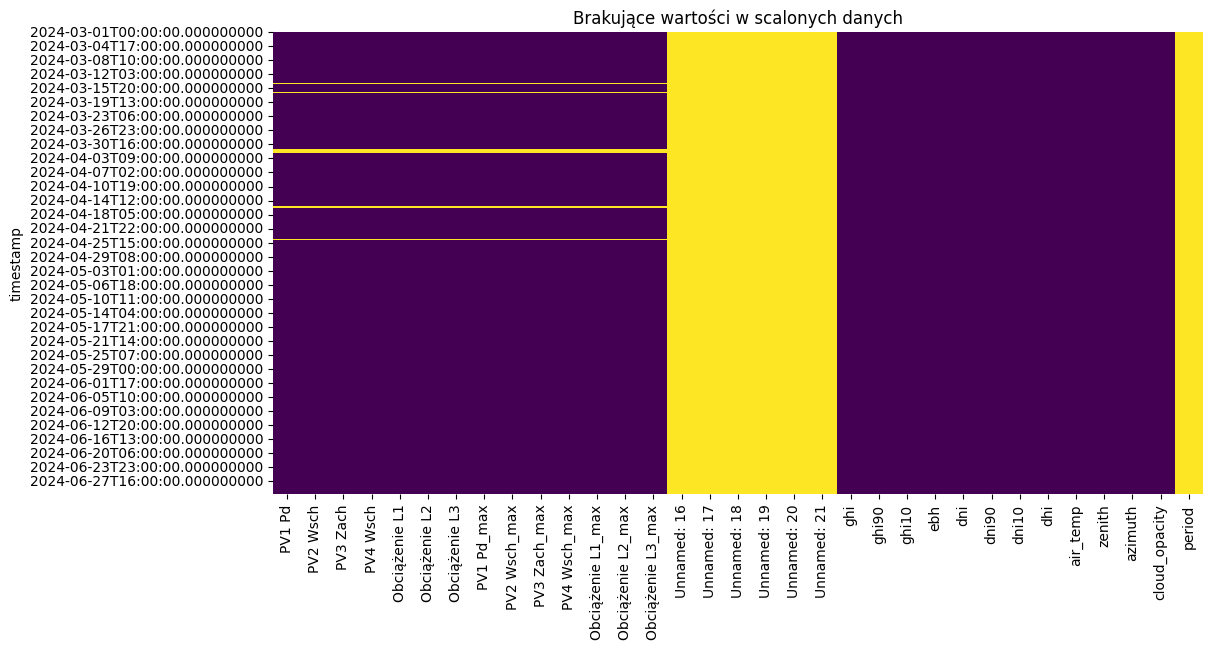

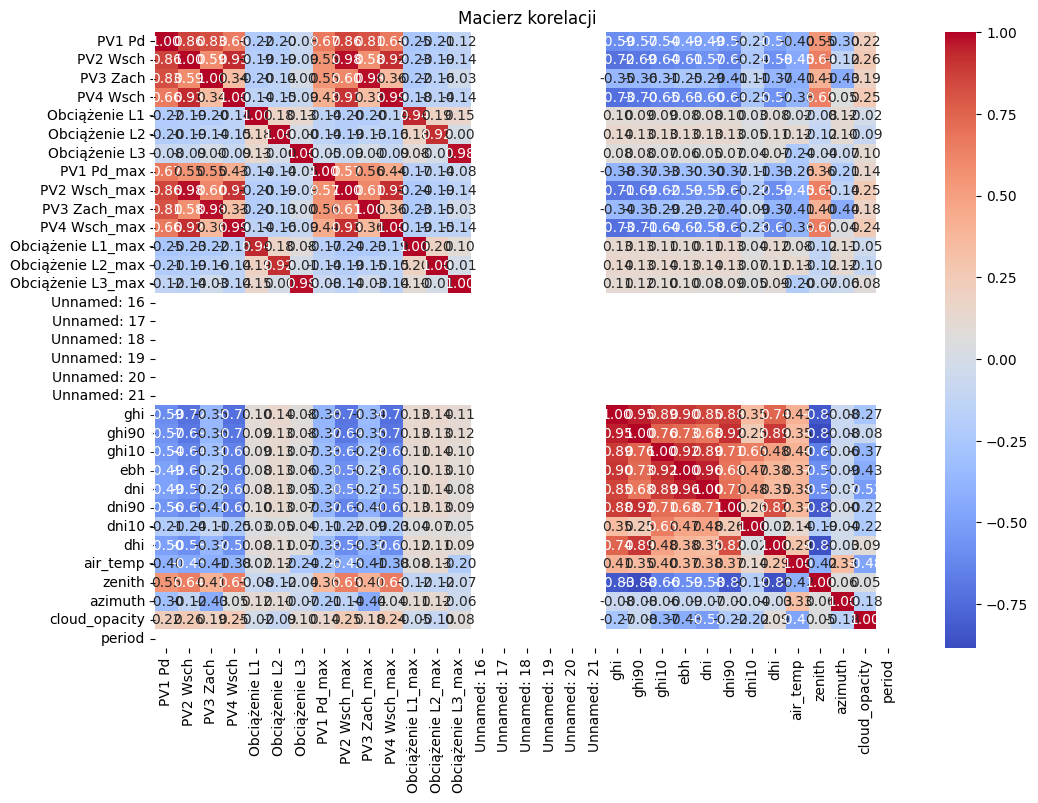

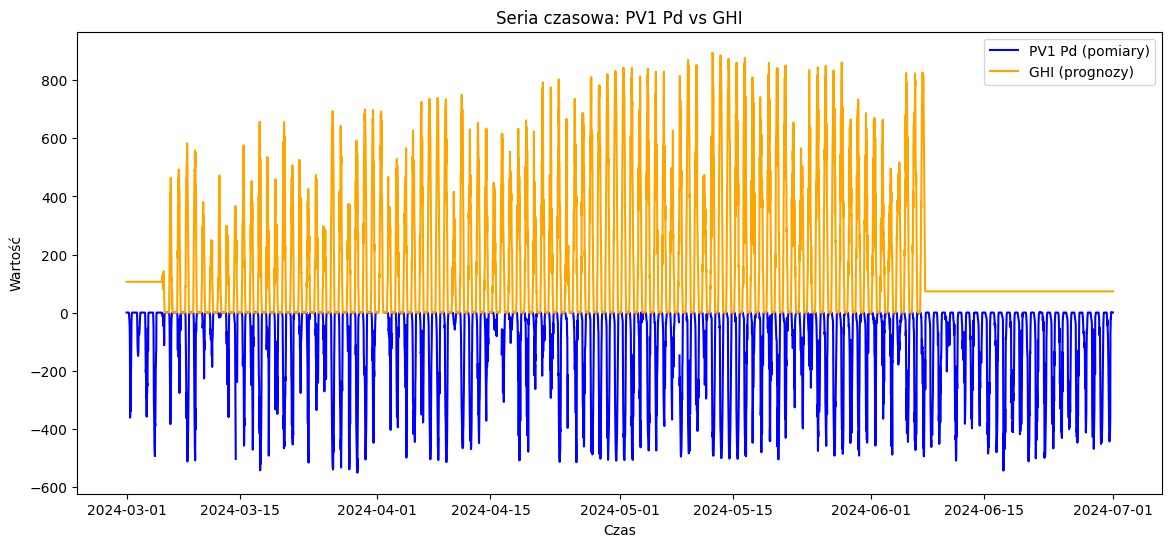

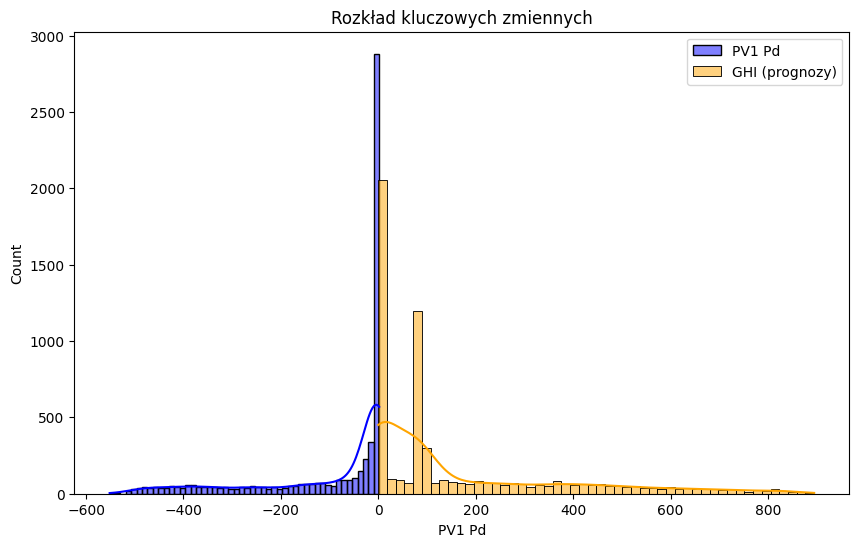

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Podstawowe statystyki opisowe
print("Podstawowe statystyki opisowe dla scalonych danych:")
print(merged_data.describe())

# Sprawdzanie brakujących wartości
missing_values = merged_data.isnull().sum()
missing_percentage = (missing_values / len(merged_data)) * 100
print("\nBrakujące wartości (liczba i %):")
print(missing_values)
print(missing_percentage)

# Wizualizacja brakujących wartości (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis')
plt.title("Brakujące wartości w scalonych danych")
plt.show()

# Korelacje między zmiennymi
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji")
plt.show()

# Wizualizacja serii czasowych (np. PV1 Pd i GHI)
plt.figure(figsize=(14, 6))
plt.plot(merged_data.index, merged_data['PV1 Pd'], label='PV1 Pd (pomiary)', color='blue')
plt.plot(merged_data.index, merged_data['ghi'], label='GHI (prognozy)', color='orange')
plt.title("Seria czasowa: PV1 Pd vs GHI")
plt.xlabel("Czas")
plt.ylabel("Wartość")
plt.legend()
plt.show()

# Histogram kluczowych zmiennych
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['PV1 Pd'], bins=50, kde=True, color='blue', label='PV1 Pd')
sns.histplot(merged_data['ghi'], bins=50, kde=True, color='orange', label='GHI (prognozy)')
plt.title("Rozkład kluczowych zmiennych")
plt.legend()
plt.show()


In [6]:
# CZYSZCZENIE DANYCH

# Usunięcie kolumn z 100% braków
columns_to_drop = [col for col in merged_data.columns if merged_data[col].isnull().sum() == len(merged_data)]
cleaned_data = merged_data.drop(columns=columns_to_drop)

# Uzupełnienie brakujących wartości w pozostałych kolumnach
# Imputacja średnią wartości dla każdej kolumny
cleaned_data = cleaned_data.fillna(cleaned_data.mean())

# Sprawdzenie końcowego zestawu danych
print("Podstawowe statystyki po czyszczeniu:")
print(cleaned_data.describe())

# Sprawdzenie, czy nadal istnieją brakujące wartości
missing_after_cleaning = cleaned_data.isnull().sum().sum()
print(f"\nLiczba brakujących wartości po czyszczeniu: {missing_after_cleaning}")

# Zapisanie oczyszczonego zestawu danych do pliku
cleaned_data.to_csv('cleaned_merged_data.csv')
print("Oczyszczone dane zapisano w pliku 'cleaned_merged_data.csv'.")


Podstawowe statystyki po czyszczeniu:
            PV1 Pd     PV2 Wsch     PV3 Zach     PV4 Wsch  Obciążenie L1  \
count  5856.000000  5856.000000  5856.000000  5856.000000    5856.000000   
mean    -96.188618  -385.609417  -148.684254  -754.919214     255.043248   
std     145.967739   545.541794   223.178154  1080.192745     198.771069   
min    -551.631667 -2046.058333  -992.446667 -3571.375000       0.000000   
25%    -144.278333  -630.302500  -207.344167 -1153.340000     157.868750   
50%     -10.280833   -54.196667   -30.490833  -167.827500     202.557500   
75%       0.000000     0.000000     0.000000     2.000000     260.210833   
max       1.895000     0.533333     0.190000    16.351667    2002.621667   

       Obciążenie L2  Obciążenie L3   PV1 Pd_max  PV2 Wsch_max  PV3 Zach_max  \
count    5856.000000    5856.000000  5856.000000   5856.000000   5856.000000   
mean       78.207393     324.419571  -124.961668   -443.970714   -171.209459   
std       186.917203     777.715202  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Wybór zmiennych wejściowych (features) i docelowych (target)
features = cleaned_data.drop(columns=['PV1 Pd'])  # Wszystkie kolumny oprócz 'PV1 Pd'
target = cleaned_data['PV1 Pd']  # Zmienna docelowa

# Podział na zbiór treningowy i testowy (80% trening, 20% test)
train_size = int(0.8 * len(cleaned_data))
X_train, X_test = features[:train_size], features[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

# Normalizacja danych za pomocą MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Tworzenie sekwencji czasowych do modelowania
def create_sequences(data, target, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(target[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 24  # Długość sekwencji (np. 24 godziny = 1 dzień)
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, sequence_length)

# Wyświetlenie rozmiarów wynikowych zbiorów
print(f"Rozmiar X_train_seq: {X_train_seq.shape}")
print(f"Rozmiar y_train_seq: {y_train_seq.shape}")
print(f"Rozmiar X_test_seq: {X_test_seq.shape}")
print(f"Rozmiar y_test_seq: {y_test_seq.shape}")


Rozmiar X_train_seq: (4660, 24, 25)
Rozmiar y_train_seq: (4660, 1)
Rozmiar X_test_seq: (1148, 24, 25)
Rozmiar y_test_seq: (1148, 1)


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Budowa modelu N-BEATS
def build_nbeats_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)  # Wyjście jednowymiarowe (wartość docelowa)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',  # Funkcja straty
                  metrics=['mae'])  # Dodatkowa metryka
    return model

# Przygotowanie modelu
input_shape = X_train_seq.shape[1:]  # (24, 25)
nbeats_model = build_nbeats_model(input_shape)

# Wyświetlenie podsumowania modelu
nbeats_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 24, 512)             │          13,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24, 256)             │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24, 128)             │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,665 (694.00 KB)

 Trainable params: 177,665 (694.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.1022 - mae: 0.2318 - val_loss: 0.0690 - val_mae: 0.2000
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0546 - mae: 0.1739 - val_loss: 0.0762 - val_mae: 0.1889
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0530 - mae: 0.1707 - val_loss: 0.0780 - val_mae: 0.1890
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0534 - mae: 0.1702 - val_loss: 0.0704 - val_mae: 0.2008
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.0523 - mae: 0.1680 - val_loss: 0.1028 - val_mae: 0.2162
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0533 - mae: 0.1703 - val_loss: 0.0902 - val_mae: 0.1905
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0530 - mae: 0.1717 - val_loss: 0.0773 - val_mae: 0.1926
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0533 - mae: 0.1701 - val_loss: 0.0758 - val_mae: 0.1983
Epoch 9/100
146/146 ━━━━━━━━━━━━━━━

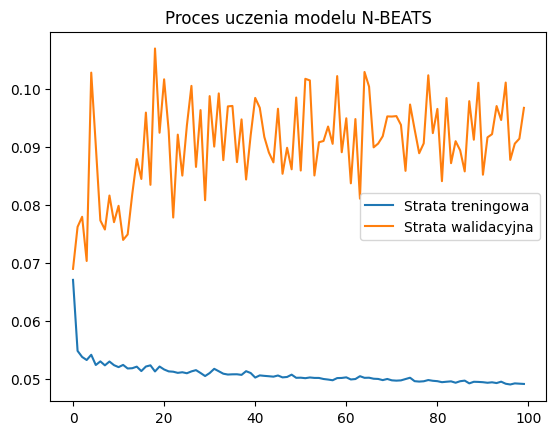

In [9]:
# Trening modelu
history = nbeats_model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=100,  # Liczba epok
    batch_size=32,  # Rozmiar wsadu
    verbose=1
)

# Wizualizacja procesu uczenia
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.legend()
plt.title("Proces uczenia modelu N-BEATS")
plt.show()


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0895 - mae: 0.1872
Test Loss (MSE): 0.09673451632261276
Test MAE: 0.1934717893600464
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


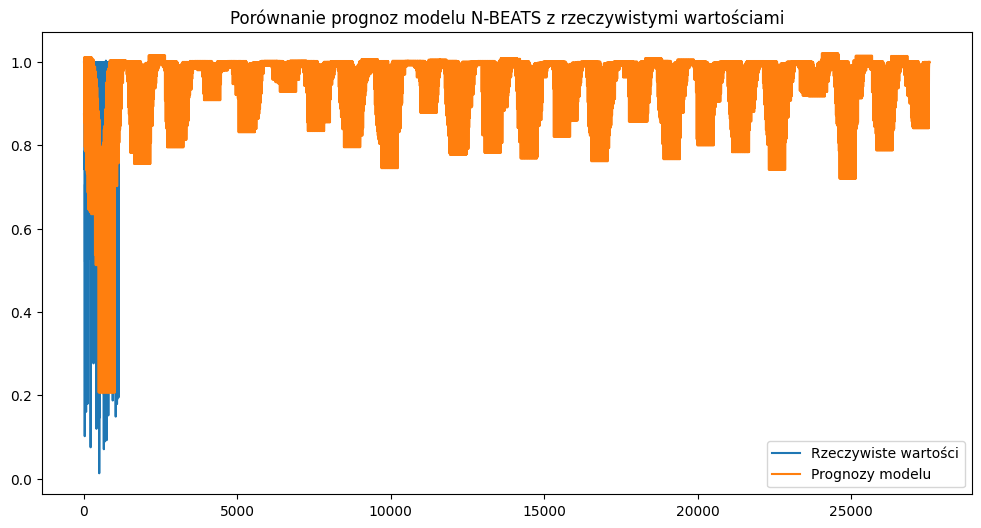

In [10]:
# Ewaluacja modelu na danych testowych
test_loss, test_mae = nbeats_model.evaluate(X_test_seq, y_test_seq, verbose=1)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

# Prognozy na danych testowych
predictions = nbeats_model.predict(X_test_seq)

# Wizualizacja prognoz
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq.flatten(), label='Rzeczywiste wartości')
plt.plot(predictions.flatten(), label='Prognozy modelu')
plt.legend()
plt.title("Porównanie prognoz modelu N-BEATS z rzeczywistymi wartościami")
plt.show()


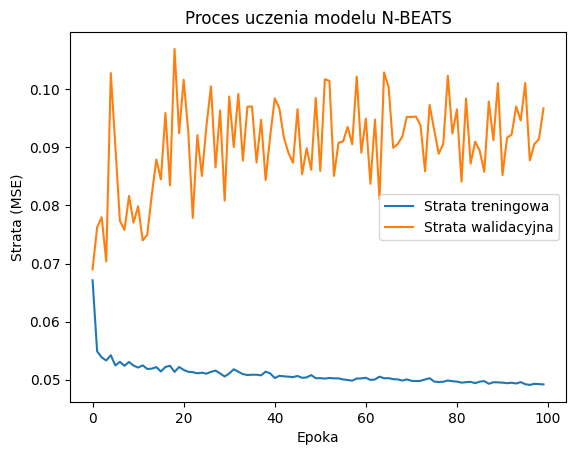

In [11]:
# Wizualizacja procesu uczenia
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.title("Proces uczenia modelu N-BEATS")
plt.xlabel("Epoka")
plt.ylabel("Strata (MSE)")
plt.legend()
plt.show()


In [12]:
# Ewaluacja modelu na danych testowych
test_loss, test_mae = nbeats_model.evaluate(X_test_seq, y_test_seq, verbose=1)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0895 - mae: 0.1872
Test Loss (MSE): 0.09673451632261276
Test MAE: 0.1934717893600464


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


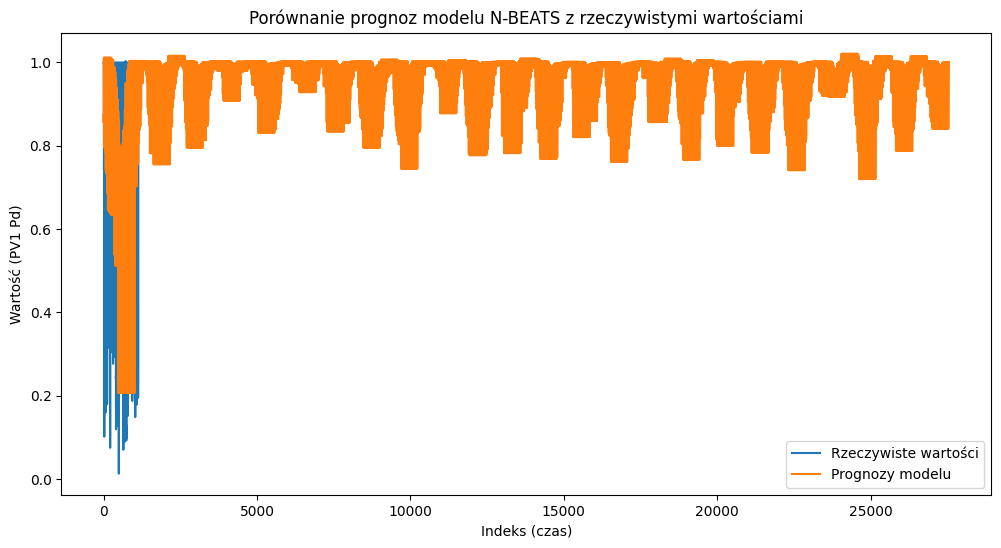

In [13]:
# Prognozy na danych testowych
predictions = nbeats_model.predict(X_test_seq)

# Wizualizacja prognoz
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq.flatten(), label='Rzeczywiste wartości')
plt.plot(predictions.flatten(), label='Prognozy modelu')
plt.title("Porównanie prognoz modelu N-BEATS z rzeczywistymi wartościami")
plt.xlabel("Indeks (czas)")
plt.ylabel("Wartość (PV1 Pd)")
plt.legend()
plt.show()
